In [20]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt





In [21]:
def image_toarray(path):

    try:
        img = Image.open(path).convert("L")
        img = img.resize((28, 28))
        digit_array = np.array(img)
      
        return digit_array
    except FileNotFoundError:
        
        print("shit's fucked up")
    except Exception as e:
        print("something's fucked up:", e)


In [22]:
def make_my_image(img_data):
    plt.imshow(img_data, cmap="binary")
    plt.axis("off")  # Removes axes for better visualization
    plt.show(block="True")


In [23]:
paths = r"G:\elephant.png"
data = image_toarray(paths)
if data is not None:  # Fix incorrect condition check
    make_my_image(data)

shit's fucked up


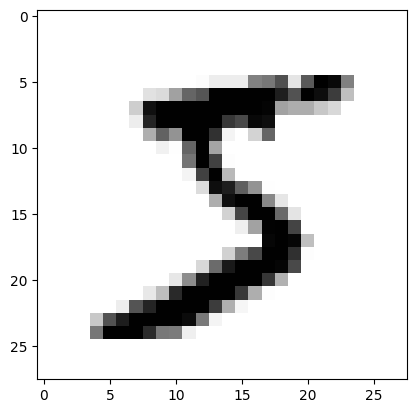

In [24]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
dataa=fetch_openml("mnist_784",as_frame=False)

classifier=SGDClassifier(random_state=42)
x,y=dataa.data,dataa.target

def plot(numbo):
    img=numbo.reshape((28,28))
    plt.imshow(img,cmap="binary")
    plt.show()
    
some_digit=x[0]    
pict=plot(some_digit)




In [25]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

y_train_9=(y_train=="5")
y_test_9=(y_train=="5")

classifier.fit(x_train,y_train_9)
classifier.predict([some_digit])

array([ True])

In [26]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(classifier,x_train,y_train_9,cv=3,scoring="accuracy")
print(cvs)

[0.95035 0.96035 0.9604 ]


In [27]:
from sklearn.dummy import DummyClassifier
dummmyclass=DummyClassifier(strategy="most_frequent")
dummmyclass.fit(x_train,y_train_9)
dummmyclass.predict([some_digit])

array([False])

In [28]:
cvss=cross_val_score(dummmyclass,x_train,y_train_9,cv=3,scoring="accuracy")
print(cvss)

[0.90965 0.90965 0.90965]


In [29]:
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
import numpy as np
skfolds=StratifiedKFold(n_splits=3)

for train_index,test_index in skfolds.split(x_train,y_train_9):
    clone_model=clone(classifier)
    x_train_folds=x_train[train_index]
    x_test_folds=x_train[test_index]
    y_train_folds=y_train_9[train_index]
    y_test_folds=y_train_9[test_index]
    
    
    clone_model.fit(x_train_folds,y_train_folds)
    y_pred=clone_model.predict(x_test_folds)
    cor_pred=np.sum(y_pred== y_test_folds).astype("int")
    cv=cor_pred/len(y_pred)
    print(cv)
    
    

0.95035
0.96035
0.9604


In [30]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(classifier,x_train,y_train_9,cv=3)
print(y_train_pred)


[ True False False ...  True False False]


In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_9,y_train_pred)


In [32]:
from sklearn.metrics import precision_score,recall_score

print(precision_score(y_train_9,y_train_pred))
print(recall_score(y_train_9,y_train_pred))
      

0.8370879772350012
0.6511713705958311


In [33]:
from sklearn.metrics import f1_score
f1sc=f1_score(y_train_9,y_train_pred)
print(f1sc)

0.7325171197343847


In [34]:
y_scores=classifier.decision_function([some_digit])
print(y_scores)
threshold=0
y_some_digit=(y_scores>threshold)
print(y_some_digit)


[2164.22030239]
[ True]


In [35]:
threshold=3000
y_some_digit=(y_scores>threshold)
print(y_some_digit)

[False]


In [49]:
from sklearn.model_selection import cross_val_predict
y_score=cross_val_predict(classifier,x_train,y_train_9,cv=3,method="decision_function")
y_real=y_score.flatten()
print(y_real.shape)

(60000,)


In [51]:

from sklearn.metrics import precision_recall_curve
print(y_train_9.shape)
precision,recall,thresholds=precision_recall_curve(y_train_9,y_real)

(60000,)


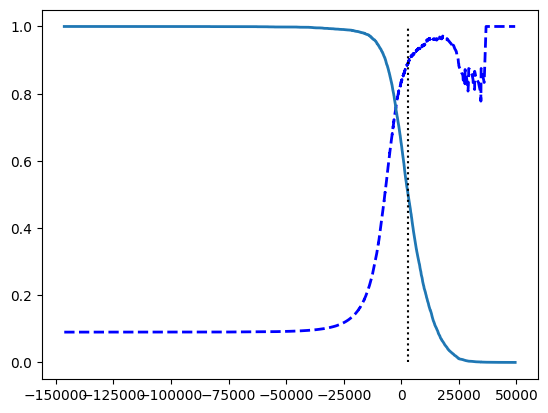

In [54]:
plt.plot(thresholds,precision[:-1],"b--",linewidth=2)
plt.plot(thresholds,recall[:-1],linewidth=2)
plt.vlines(threshold,0,1.0,"k","dotted",label="threshold")

plt.show()

In [56]:
idx_for_90_prec=(precision>=0.90).argmax()#gets the first true value 

threshold_lowest=thresholds[idx_for_90_prec]
print(threshold_lowest)

3370.0194991439557


In [64]:
y_train_pred_90=(y_score >= threshold_lowest)








[False False False ...  True False False]


In [67]:
print(precision_score(y_train_9,y_train_pred_90))
print(recall_score(y_train_9,y_train_pred_90))

0.9000345901072293
0.4799852425751706
